In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

In [6]:
def distance_to_plane(x, a, b):
    sign = 1 if a.dot(x) <= b else -1
    return sign * (b - a.dot(x)) / la.norm(a)

def project(x, a, b):
    # project x onto plane a'x = b
    return x + 1.0 * a * (b - a.dot(x)) / a.dot(a)

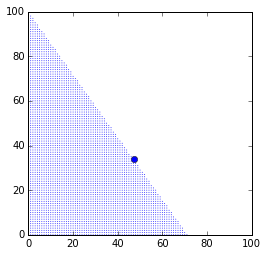

In [7]:
a = np.array([14, 10])
b = 1000
x0 = project([0, 0], a, b)

X = []

gridx = gridy = np.linspace(0, 100, 101)

for x1 in gridx: 
    for x2 in gridy: 
        x = [x1, x2]
        if a.dot(x) < b:
            X.append(x)

X = np.array(X)
plt.figure(figsize = (4, 4))
plt.xlim(gridx[0], gridx[-1])
plt.ylim(gridy[0], gridy[-1])
plt.scatter(X[:, 0], X[:, 1], s = 0.8, edgecolors = 'none')
plt.plot(x0[0], x0[1], 'o')
plt.show()